## TilecodePandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://vgridpandas.gishub.vn/lab/index.html?path=notebooks/12_tilecode.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [1]:
# %pip install vgridpandas

### Latlong to Tilecode

In [2]:
import pandas as pd
from vgridpandas import tilecodepandas
df = pd.DataFrame({'lat': [10.775299665325505, 10.78731693], 'lon':[106.70647975040788,107.99626405]})
resolution = 10
df = df.tilecode.latlon2tilecode(resolution)
df

,lat,lon
tilecode_10,,
z10x815y481,10.775300,106.706480
z10x819y481,10.787317,107.996264


### Tilecode to geo boundary

In [3]:
df = df.tilecode.tilecode2geo()
df

,lat,lon,geometry
tilecode_10,,,
z10x815y481,10.775300,106.706480,"POLYGON ((106.52344 10.48781, 106.875 10.48781..."
z10x819y481,10.787317,107.996264,"POLYGON ((107.92969 10.48781, 108.28125 10.487..."


### (Multi)Linestring/ (Multi)Polygon to Tilecode

<Axes: >

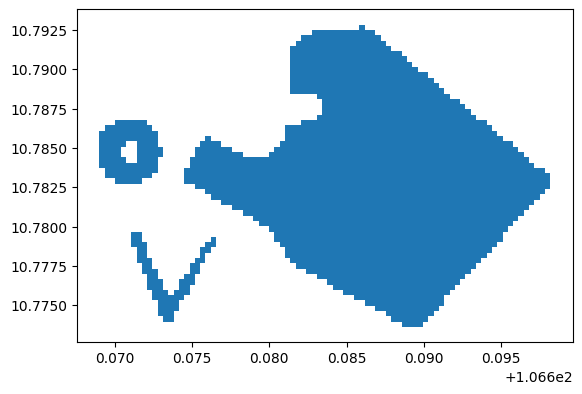

In [9]:
import geopandas as gpd
from vgridpandas import geohashpandas

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 20
gdf_polyfill = gdf.tilecode.polyfill(resolution, predicate = "intersects", compact = True)
gdf_polyfill = gdf_polyfill.tilecode.tilecode2geo(tilecode_column = "tilecode_polyfill")
gdf_polyfill.plot()

### Tilecode point binning

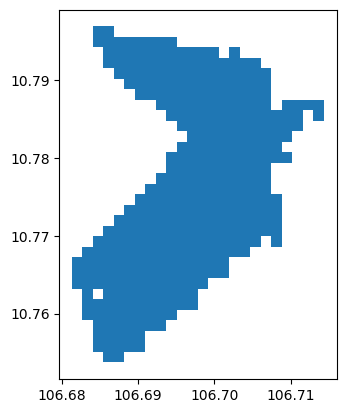

In [10]:
resolution = 18
# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
df.head()
stats = "count"
df_bin = df.tilecode.tilecodebin(resolution=resolution, stats = stats, return_geometry=True)
df_bin.plot()